### Import the necessary libraries

In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# load data
transactions = pd.read_csv('data/transactions.csv')
loans = pd.read_csv('data/loan_applications.csv')

In [3]:
transactions.head()

,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,ba998721-a612-4e0a-8354-46d001e9c39c,CUST107144,2022-01-03 23:52:00,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6,CUST102126,2022-01-15 06:54:00,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,c4fce988-34c5-48db-8686-bfad0b3bc0b5,CUST109887,2022-01-08 07:57:00,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,f9b8ca30-00e5-4322-8cff-eac0554cf2da,CUST108620,2022-01-02 10:43:00,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0


In [4]:
transactions["transaction_status"].unique()

array(['Success', 'Failed'], dtype=object)

In [8]:
transactions["transaction_type"].unique()

array(['Bill Payment', 'UPI', 'Debit Card', 'Credit Card',
       'Loan Disbursement', 'ATM Withdrawal', 'Net Banking',
       'Fund Transfer', 'Deposit', 'EMI Payment'], dtype=object)

In [7]:
transactions["device_used"].unique()

array(['Web', 'ATM', 'Mobile', 'POS'], dtype=object)

In [6]:
transactions["merchant_name"].unique()

array(['Rattan, Khanna and Magar', 'Chauhan LLC', 'Halder-Sarma', ...,
       'Venkataraman, Bhandari and Sampath', 'Khurana-Korpal',
       'Chada-Saha'], dtype=object)

In [25]:
loans.head()

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


In [26]:
loans.dtypes

application_id                object
customer_id                   object
application_date              object
loan_type                     object
loan_amount_requested        float64
loan_tenure_months             int64
interest_rate_offered        float64
purpose_of_loan               object
employment_status             object
monthly_income               float64
cibil_score                    int64
existing_emis_monthly        float64
debt_to_income_ratio         float64
property_ownership_status     object
residential_address           object
applicant_age                  int64
gender                        object
number_of_dependents           int64
loan_status                   object
fraud_flag                     int64
fraud_type                    object
dtype: object

In [48]:
transactions.dtypes

transaction_id                        object
customer_id                           object
transaction_date                      object
transaction_type                      object
transaction_amount                   float64
merchant_category                     object
merchant_name                         object
transaction_location                  object
account_balance_after_transaction    float64
is_international_transaction           int64
device_used                           object
ip_address                            object
transaction_status                    object
transaction_source_destination        object
transaction_notes                     object
fraud_flag                             int64
dtype: object

In [27]:
loans['loan_type'].unique()

array(['Business Loan', 'Car Loan', 'Education Loan', 'Personal Loan',
       'Home Loan'], dtype=object)

In [28]:
loans["purpose_of_loan"].unique()

array(['Medical Emergency', 'Education', 'Debt Consolidation',
       'Business Expansion', 'Wedding', 'Vehicle Purchase',
       'Home Renovation'], dtype=object)

In [29]:
loans["fraud_flag"].unique()

array([0, 1])

Transactions Dataset Shape: (50000, 16)
fraud_flag
0    49498
1      502
Name: count, dtype: int64


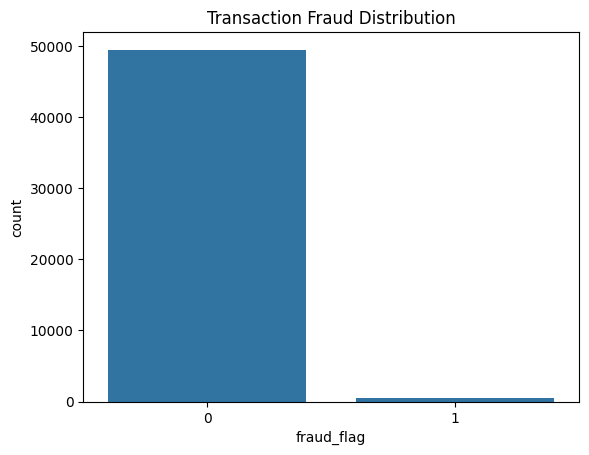

In [30]:
print("Transactions Dataset Shape:", transactions.shape)
print(transactions['fraud_flag'].value_counts())

sns.countplot(x='fraud_flag', data=transactions)
plt.title('Transaction Fraud Distribution')
plt.show()

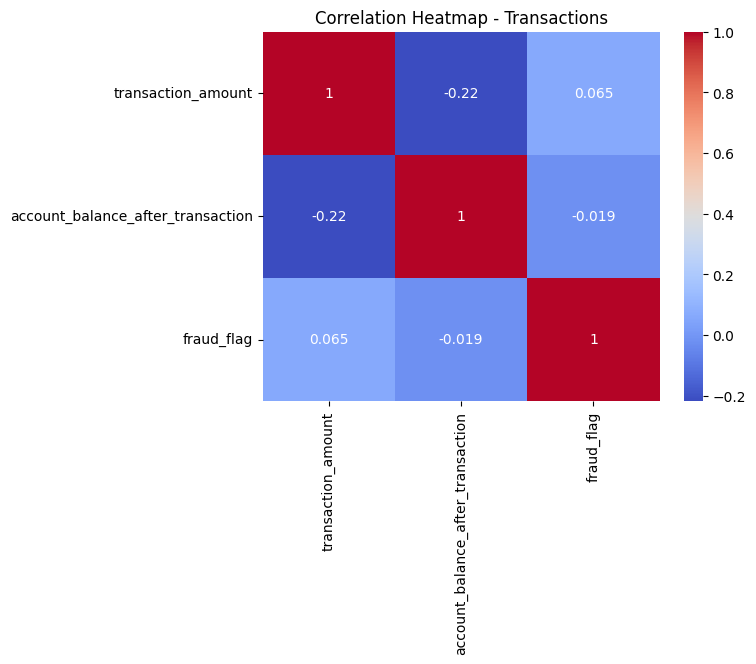

In [31]:
num_cols = ['transaction_amount', 'account_balance_after_transaction']
sns.heatmap(transactions[num_cols + ['fraud_flag']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Transactions')
plt.show()

Loan Applications Dataset Shape: (50000, 21)
fraud_flag
0    48974
1     1026
Name: count, dtype: int64


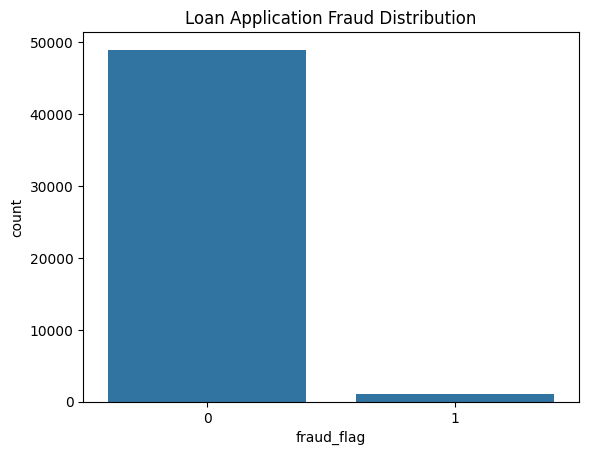

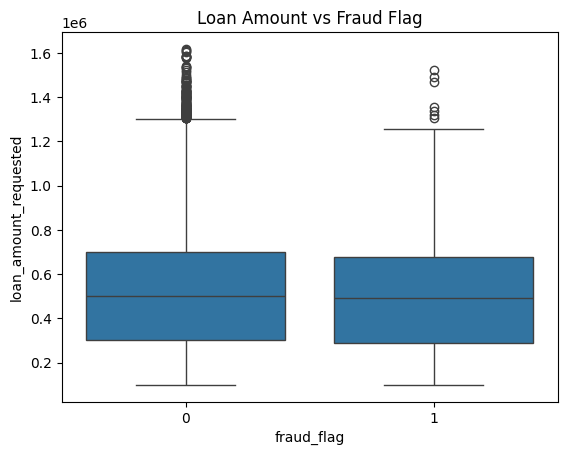

In [32]:
print("Loan Applications Dataset Shape:", loans.shape)
print(loans['fraud_flag'].value_counts())

sns.countplot(x='fraud_flag', data=loans)
plt.title('Loan Application Fraud Distribution')
plt.show()

# Distribution of Loan Amount by Fraud
sns.boxplot(x='fraud_flag', y='loan_amount_requested', data=loans)
plt.title('Loan Amount vs Fraud Flag')
plt.show()

### Outlier detection 

Numerical columns: ['loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered', 'monthly_income', 'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio', 'applicant_age', 'number_of_dependents', 'fraud_flag']
Initial Box plots for numerical features:


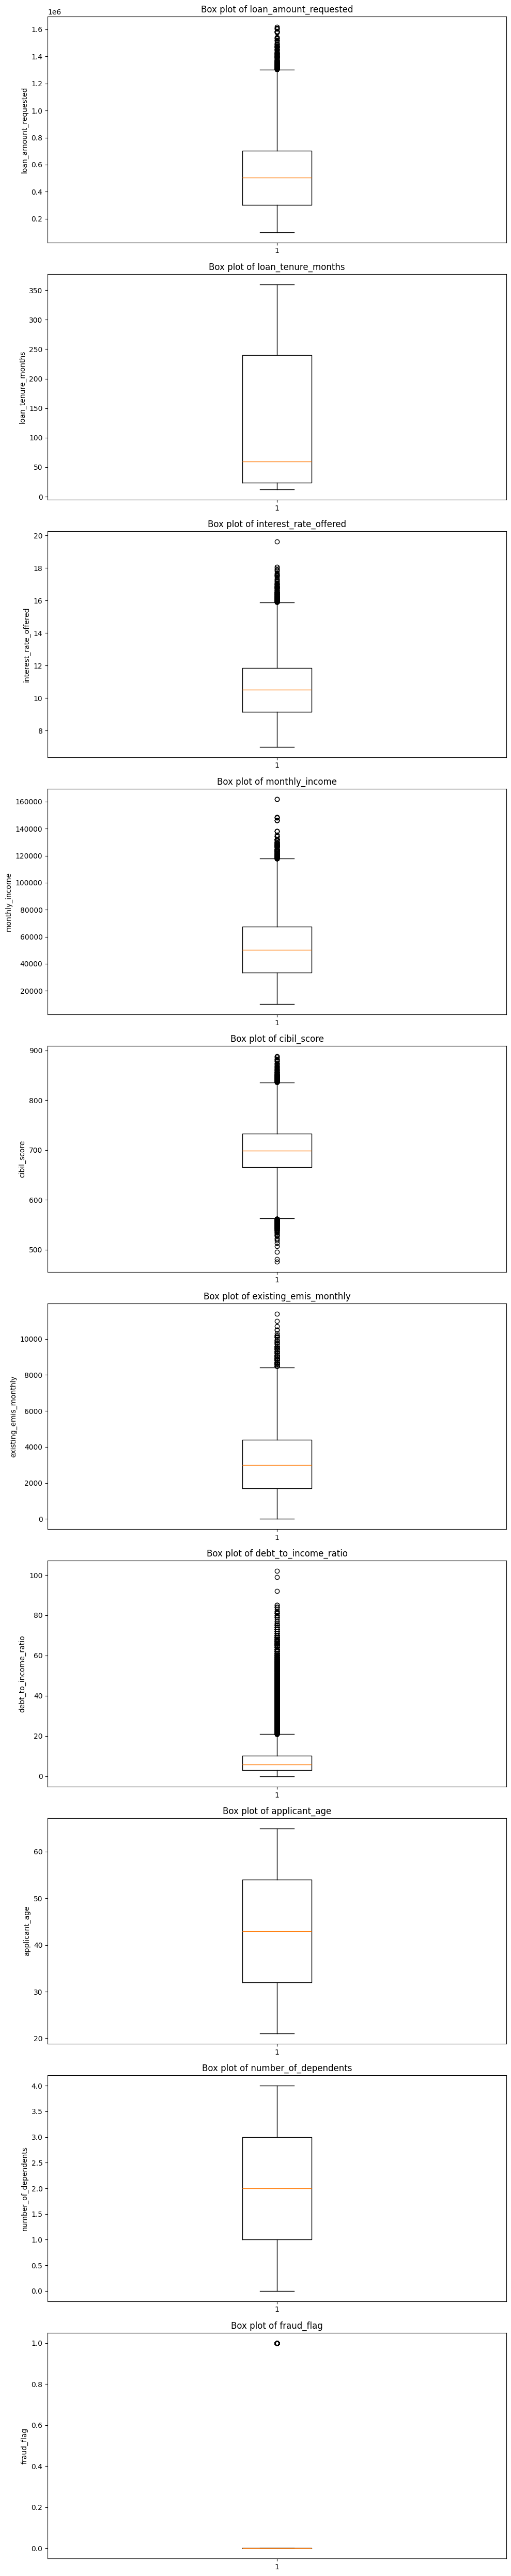

In [33]:
# Identify numerical columns
numerical_cols = loans.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

print("Initial Box plots for numerical features:")
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(10, 5 * len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(loans[col].dropna())
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

Numerical columns: ['transaction_amount', 'account_balance_after_transaction', 'is_international_transaction', 'fraud_flag']
Initial Box plots for numerical features:


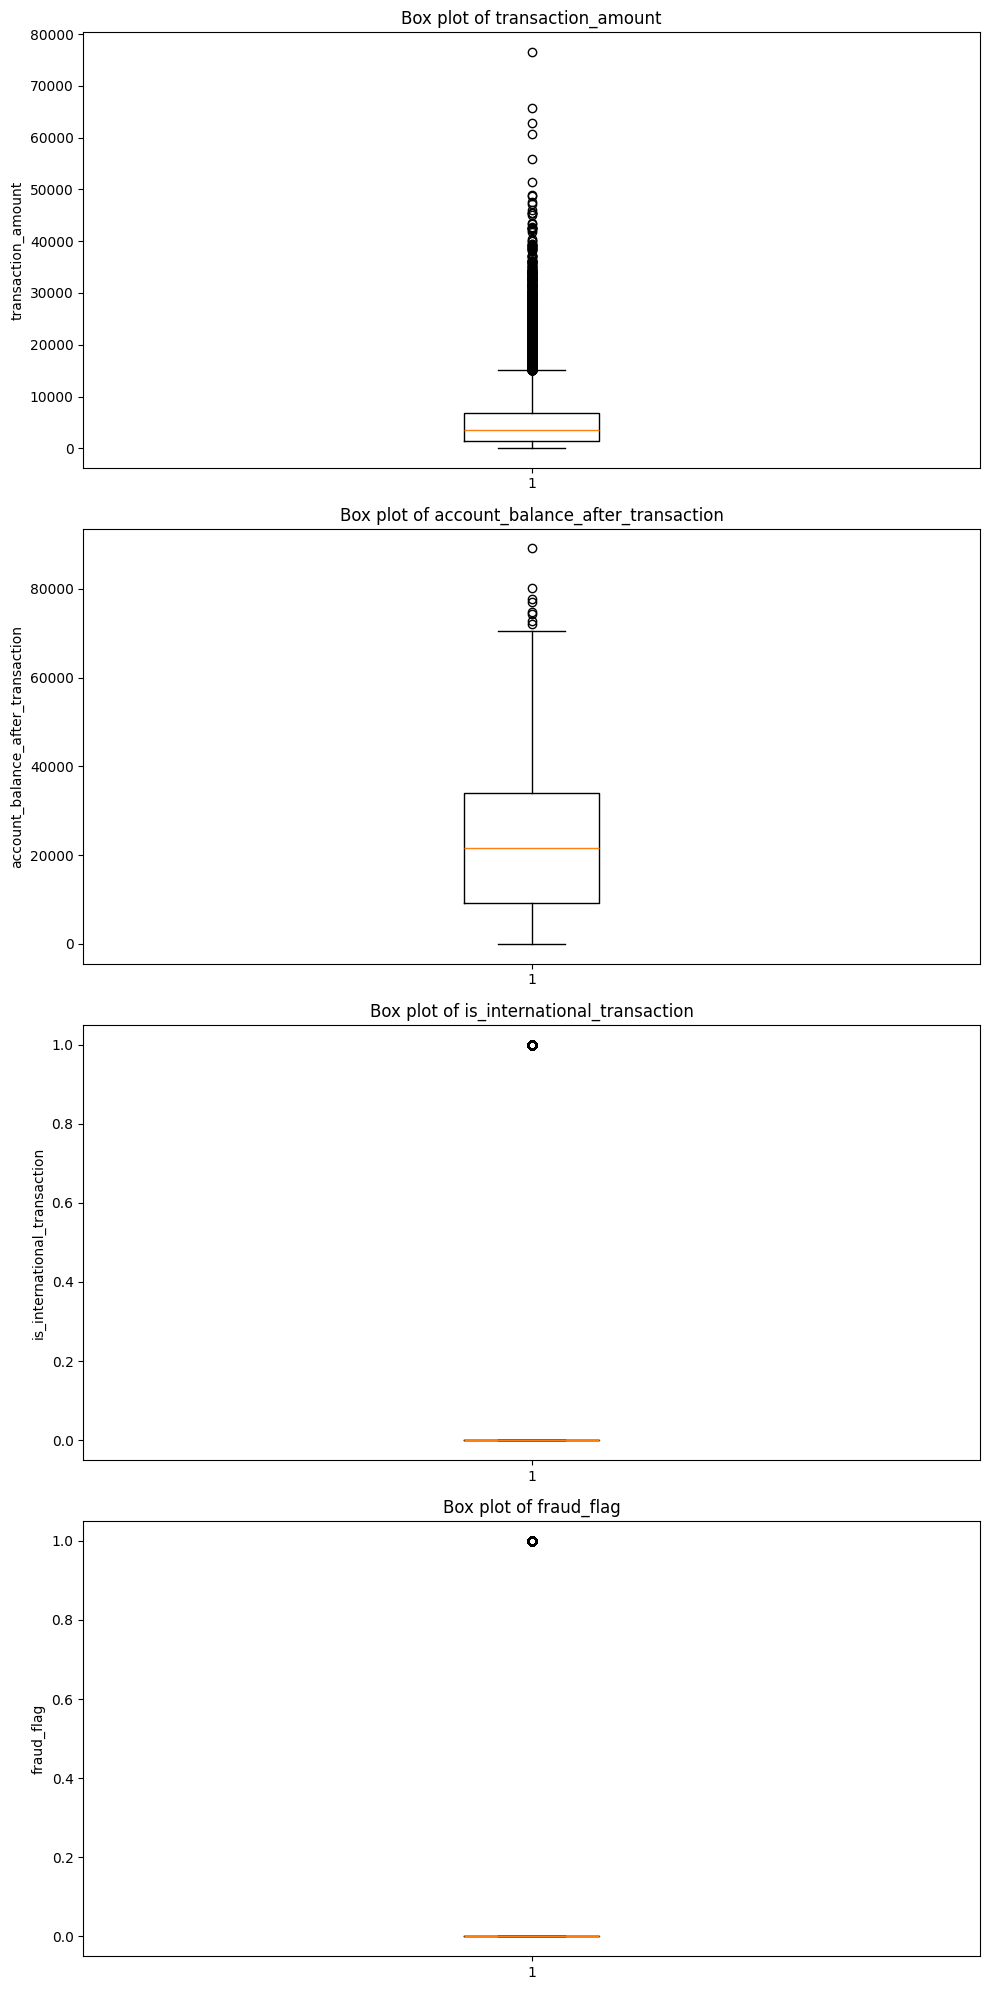

In [34]:
# Identify numerical columns
numerical_cols = transactions.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

print("Initial Box plots for numerical features:")
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(10, 5 * len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(transactions[col].dropna())
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [35]:
loans.isnull().sum()

application_id                   0
customer_id                      0
application_date                 0
loan_type                        0
loan_amount_requested            0
loan_tenure_months               0
interest_rate_offered            0
purpose_of_loan                  0
employment_status                0
monthly_income                   0
cibil_score                      0
existing_emis_monthly            0
debt_to_income_ratio             0
property_ownership_status        0
residential_address              0
applicant_age                    0
gender                           0
number_of_dependents             0
loan_status                      0
fraud_flag                       0
fraud_type                   48974
dtype: int64

In [36]:
transactions.isnull().sum()

transaction_id                       0
customer_id                          0
transaction_date                     0
transaction_type                     0
transaction_amount                   0
merchant_category                    0
merchant_name                        0
transaction_location                 0
account_balance_after_transaction    0
is_international_transaction         0
device_used                          0
ip_address                           0
transaction_status                   0
transaction_source_destination       0
transaction_notes                    0
fraud_flag                           0
dtype: int64

In [37]:
print("\nLoan Applications DataFrame Unique Value Counts:")
print(loans.nunique())
print("\nTransactions DataFrame Unique Value Counts:")
print(transactions.nunique())


Loan Applications DataFrame Unique Value Counts:
application_id               50000
customer_id                  18314
application_date              1096
loan_type                        5
loan_amount_requested         1312
loan_tenure_months               7
interest_rate_offered          983
purpose_of_loan                  7
employment_status                6
monthly_income                1101
cibil_score                    354
existing_emis_monthly          108
debt_to_income_ratio          3288
property_ownership_status        3
residential_address          18314
applicant_age                   45
gender                           3
number_of_dependents             5
loan_status                      4
fraud_flag                       2
fraud_type                       4
dtype: int64

Transactions DataFrame Unique Value Counts:
transaction_id                       50000
customer_id                          18318
transaction_date                     30012
transaction_type            

In [38]:
loans['customer_id'].isin(transactions['customer_id']).all()

False